In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
pd.plotting.register_matplotlib_converters()
import seaborn as sns
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from mlxtend.preprocessing import minmax_scaling

In [5]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
train = pd.read_csv(r'C:\Users\paraicoreilly\Desktop\project_code\PM\all_data_organised.csv',parse_dates=True)

#Take a peek at data to see if its okay
train.head(5)
train.dropna(axis=0, inplace=True)

count   3302.000
mean      10.280
std        8.899
min       -0.200
25%        5.000
50%        7.300
75%       12.200
max      107.700
Name: PM25, dtype: float64
Skewness: 3.093344
Kurtosis: 15.949485


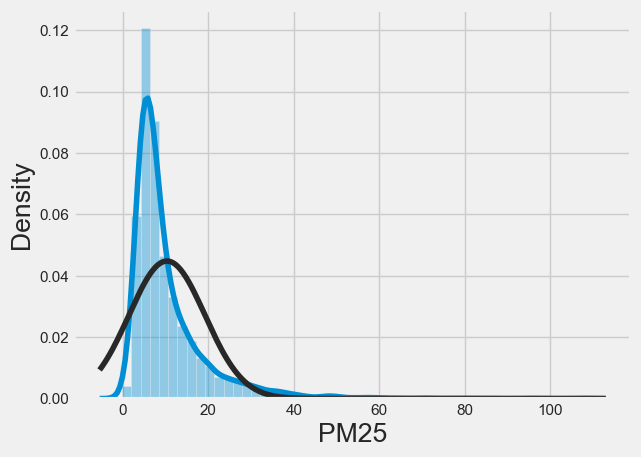

In [6]:
sns.set()

print(train['PM25'].describe())

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})
sns.distplot(train['PM25'],fit=norm)
print("Skewness: %f" % train['PM25'].skew())
print("Kurtosis: %f" % train['PM25'].kurt())

count   3302.000
mean       9.433
std        4.629
min       -8.100
25%        6.100
50%        9.500
75%       13.200
max       21.100
Name: temp, dtype: float64


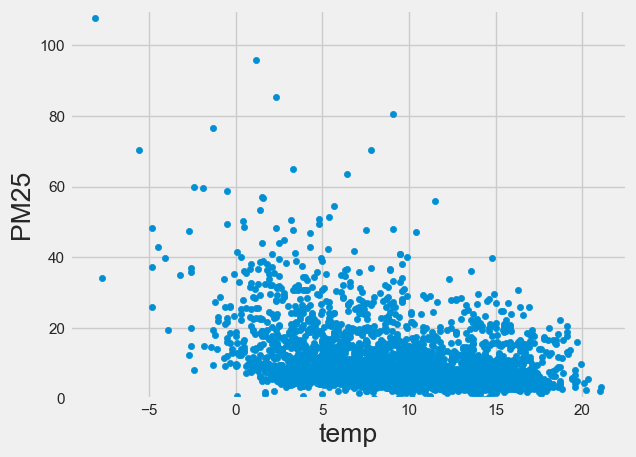

In [7]:
print(train['temp'].describe())
data = pd.concat([train['PM25'], train['temp']], axis=1)
data.plot.scatter(x='temp', y='PM25', ylim=(0,110));

count   3302.000
mean      83.037
std        7.248
min       54.000
25%       78.100
50%       83.200
75%       88.300
max      100.000
Name: r_hum, dtype: float64


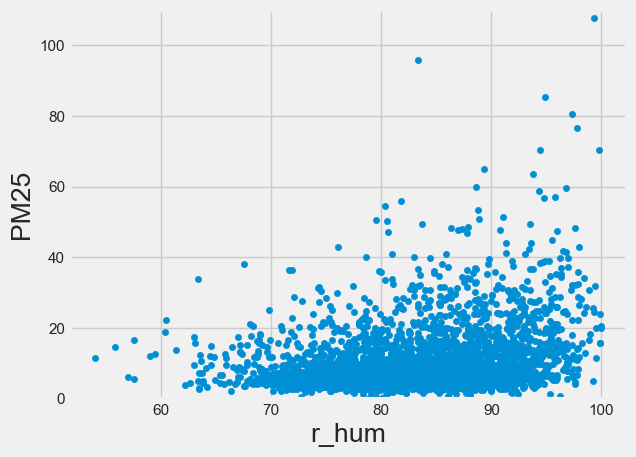

In [8]:
print(train['r_hum'].describe())
data = pd.concat([train['PM25'], train['r_hum']], axis=1)
data.plot.scatter(x='r_hum', y='PM25', ylim=(0,110));

count   3302.000
mean      10.697
std        4.309
min        2.300
25%        7.500
50%        9.900
75%       13.300
max       28.800
Name: wdsp, dtype: float64


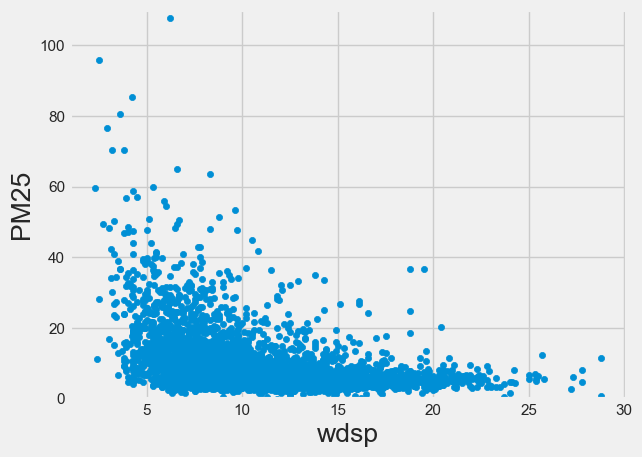

In [9]:
print(train['wdsp'].describe())
data = pd.concat([train['PM25'], train['wdsp']], axis=1)
data.plot.scatter(x='wdsp', y='PM25', ylim=(0,110));

count   3302.000
mean    1013.277
std       12.032
min      960.000
25%     1006.000
50%     1014.000
75%     1021.000
max     1042.000
Name: msl, dtype: float64


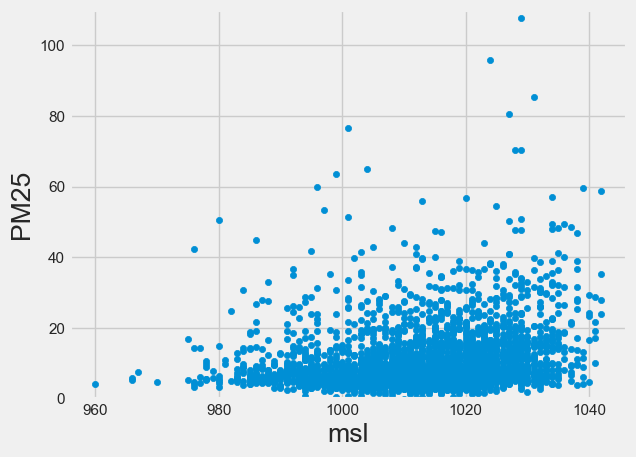

In [10]:
print(train['msl'].describe())
data = pd.concat([train['msl'], train['PM25']], axis=1)
data.plot.scatter(x='msl', y='PM25', ylim=(0,110));

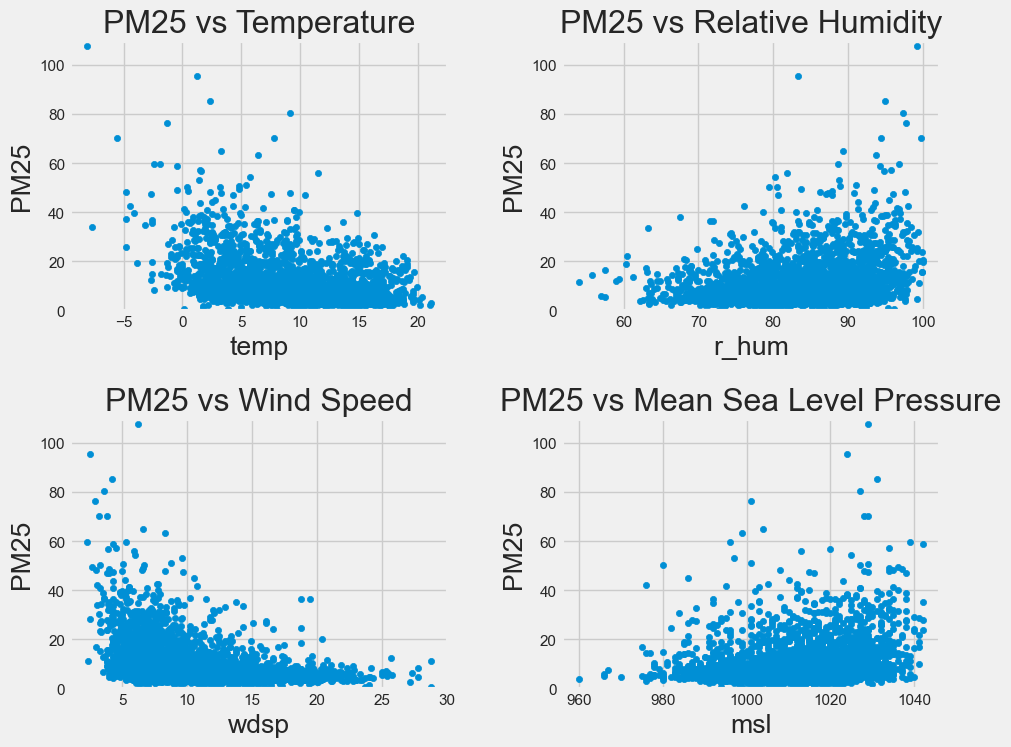

In [11]:
# create a 2x2 subplot grid
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# plot each scatter plot on a separate subplot
data = pd.concat([train['PM25'], train['temp']], axis=1)
data.plot.scatter(x='temp', y='PM25', ylim=(0,110), ax=axs[0, 0])

data = pd.concat([train['PM25'], train['r_hum']], axis=1)
data.plot.scatter(x='r_hum', y='PM25', ylim=(0,110), ax=axs[0, 1])

data = pd.concat([train['PM25'], train['wdsp']], axis=1)
data.plot.scatter(x='wdsp', y='PM25', ylim=(0,110), ax=axs[1, 0])

data = pd.concat([train['msl'], train['PM25']], axis=1)
data.plot.scatter(x='msl', y='PM25', ylim=(0,110), ax=axs[1, 1])

# set titles for each subplot
axs[0, 0].set_title('PM25 vs Temperature')
axs[0, 1].set_title('PM25 vs Relative Humidity')
axs[1, 0].set_title('PM25 vs Wind Speed')
axs[1, 1].set_title('PM25 vs Mean Sea Level Pressure')

# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# display the figure
plt.show()

count     8.000
mean     81.413
std      14.405
min      65.000
25%      70.350
50%      78.450
75%      87.975
max     107.700
Name: PM25, dtype: float64


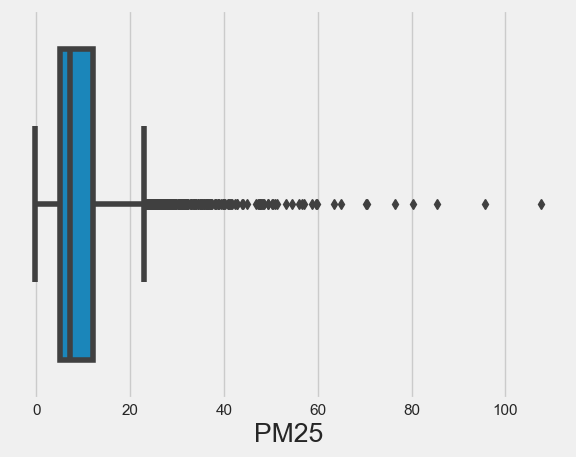

In [12]:
#Checking for outlierss

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})
check_out = train['PM25']
sns.boxplot(x=train['PM25'])
z_score = (check_out- check_out.mean()) / check_out.std()
outliers = check_out[z_score.abs() > 6]
print(outliers.describe())

count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: temp, dtype: float64


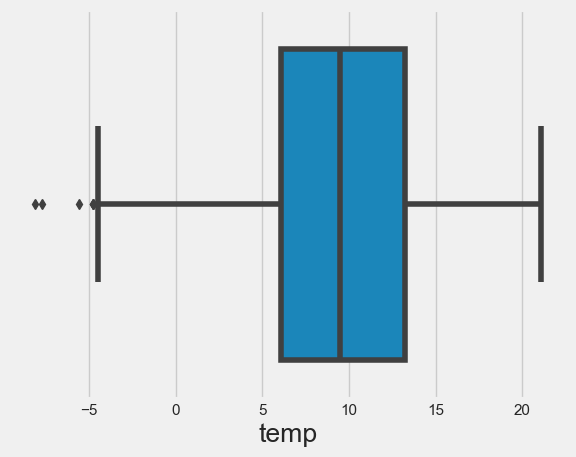

In [13]:
check_out = train['temp']
sns.boxplot(x=train['temp'])
z_score = (check_out- check_out.mean()) / check_out.std()
outliers = check_out[z_score.abs() > 5]
print(outliers.describe())


count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: r_hum, dtype: float64


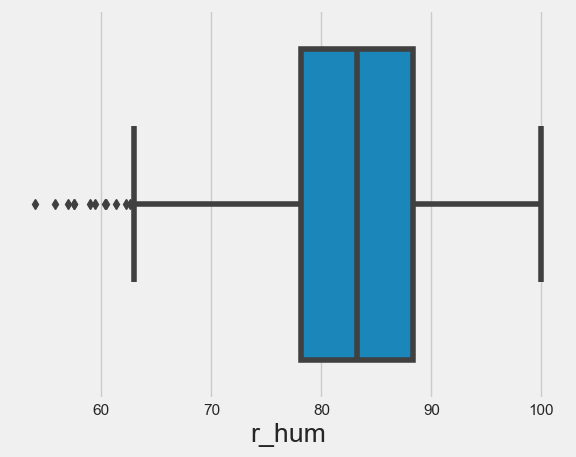

In [14]:
check_out = train['r_hum']
sns.boxplot(x=train['r_hum'])
z_score = (check_out- check_out.mean()) / check_out.std()
outliers = check_out[z_score.abs() > 5]
print(outliers.describe())

count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: wdsp, dtype: float64


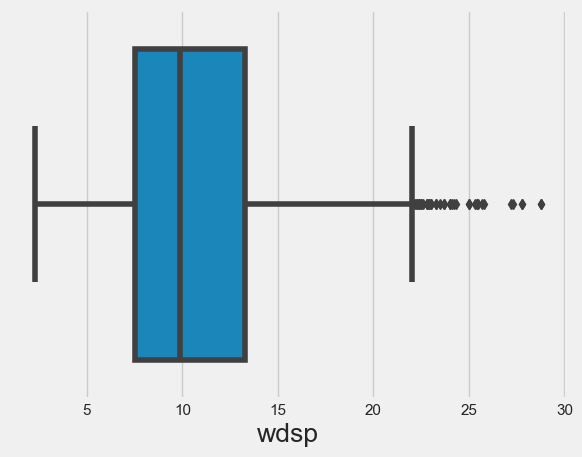

In [15]:
check_out = train['wdsp']
sns.boxplot(x=train['wdsp'])
z_score = (check_out- check_out.mean()) / check_out.std()
outliers = check_out[z_score.abs() > 5]
print(outliers.describe())

count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: msl, dtype: float64


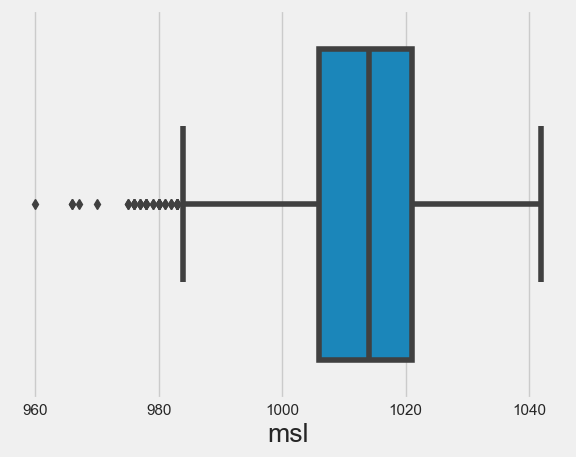

In [16]:
check_out = train['msl']
sns.boxplot(x=train['msl'])
z_score = (check_out- check_out.mean()) / check_out.std()
outliers = check_out[z_score.abs() > 5]
print(outliers.describe())

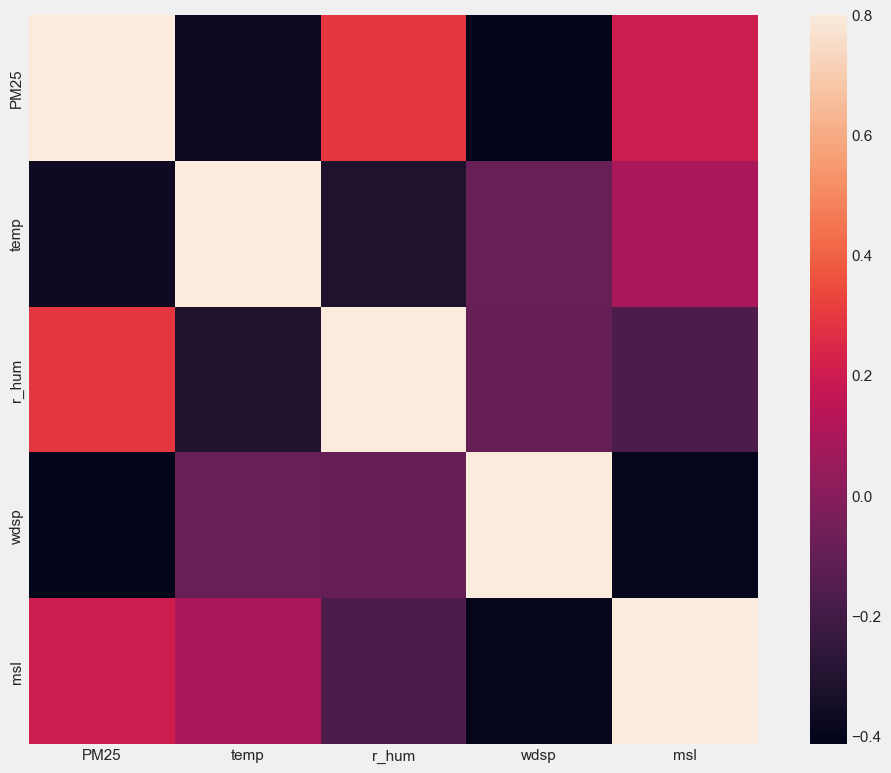

In [17]:
#Seaborn correlation heatmap
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

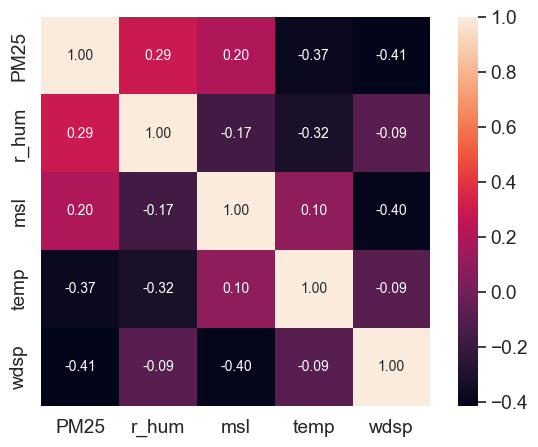

In [18]:
#Zoomed correlation matrix with PM25 in the first row and numbered squares
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'PM25')['PM25'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Variable Relationships


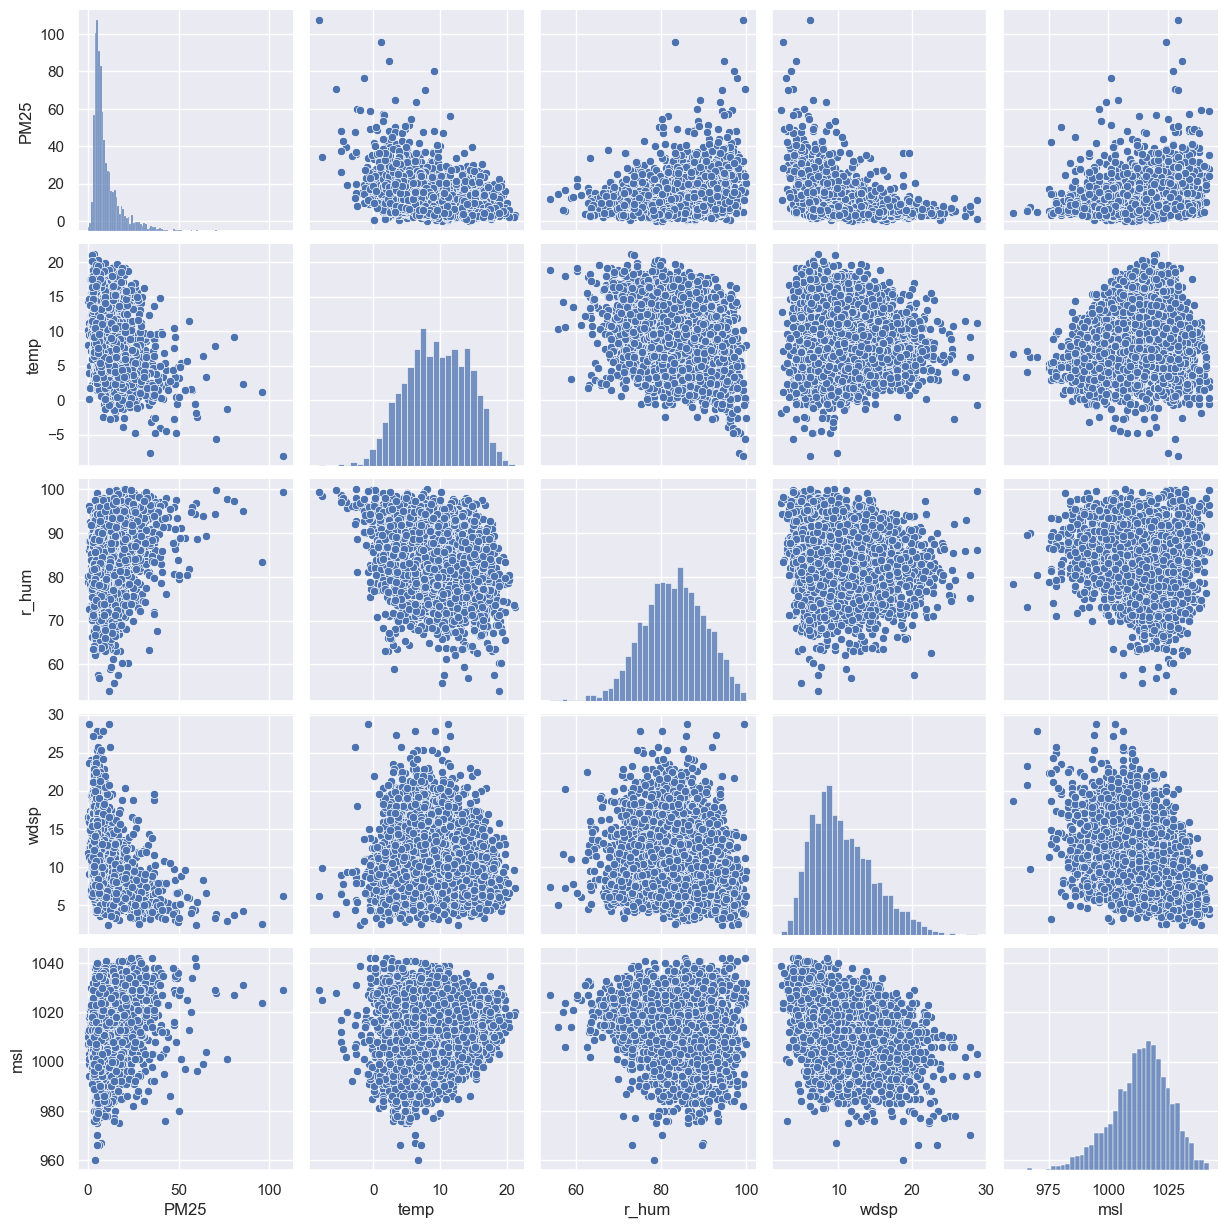

In [19]:
#scatterplot
print('Variable Relationships')
sns.set()
cols = ['PM25', 'temp', 'r_hum', 'wdsp','msl']
sns.pairplot(train[cols], size = 2.5)
plt.show();

count   3302.000
mean      10.481
std        8.899
min        0.001
25%        5.201
50%        7.501
75%       12.401
max      107.901
Name: PM25, dtype: float64


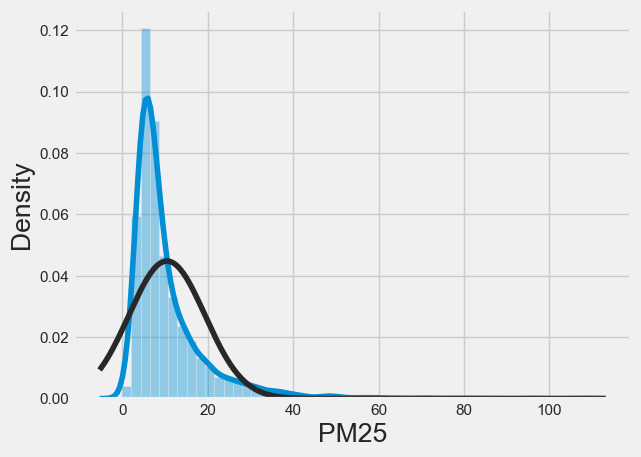

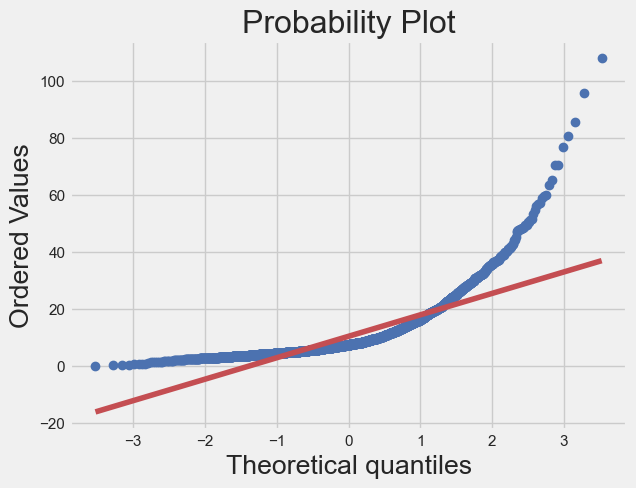

In [33]:
#Describe data to see basic descriptive stats
print(train['PM25'].describe())
#Graph target variable - we see it does not follow the normal fit

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

sns.distplot(train['PM25'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['PM25'], plot=plt)
plt.show()

Original data
Preview:
 0   31.100
1   15.200
2   17.400
3   38.200
4   23.100
Name: PM25, dtype: float64
Minimum value: 0.15 
Maximum value: 107.7
______________________________

Normalized data
Preview:
 0   2.910
1   2.383
2   2.486
3   3.055
4   2.696
Name: pm25, dtype: float64
Minimum value: -2.0883589563643827 
Maximum value: 3.7396425795829282
Distplot for boxcox transformation of PM25


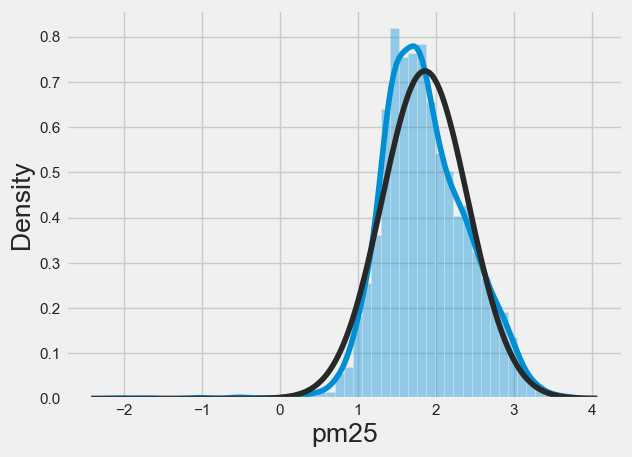

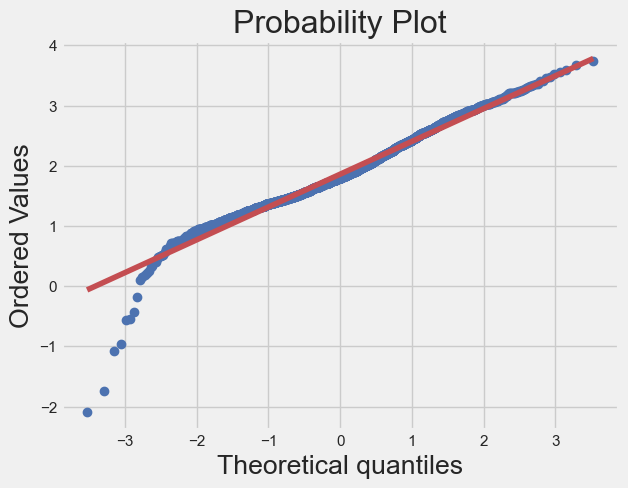

In [21]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pm25 = train.PM25 > 0

# get only positive values (using their indexes)
positive_pm25 = train.PM25.loc[index_of_positive_pm25]

# normalize the values (w/ Box-Cox)
normalized_PM25 = pd.Series(stats.boxcox(positive_pm25)[0], 
                               name='pm25', index=positive_pm25.index)

print('Original data\nPreview:\n', positive_pm25.head())
print('Minimum value:', float(positive_pm25.min()),
      '\nMaximum value:', float(positive_pm25.max()))
print('_'*30)

print('\nNormalized data\nPreview:\n', normalized_PM25.head())
print('Minimum value:', float(normalized_PM25.min()),
      '\nMaximum value:', float(normalized_PM25.max()))


#First transform - boxcox, graph is shown and skewness is compared to untransformed data


print('Distplot for boxcox transformation of PM25')
sns.distplot(normalized_PM25, fit=norm);

fig = plt.figure()
res = stats.probplot(normalized_PM25, plot=plt)

plt.show()

count   3302.000
mean      10.280
std        8.899
min       -0.200
25%        5.000
50%        7.300
75%       12.200
max      107.700
Name: PM25, dtype: float64
Distplot for scaled boxcox transformation of PM25


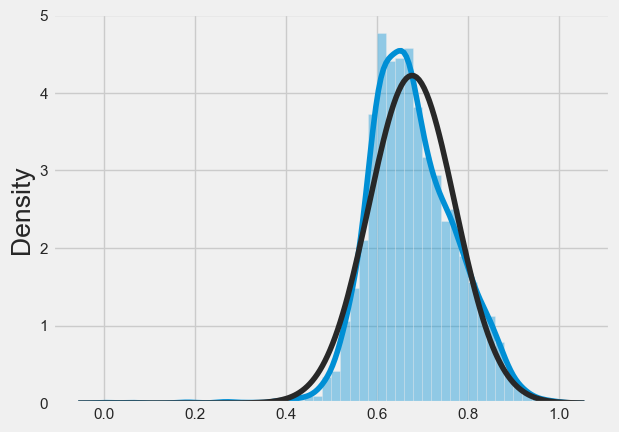

<Figure size 640x480 with 0 Axes>

In [22]:
print(train['PM25'].describe())
normalized_PM25_df = pd.DataFrame(normalized_PM25)
#scale the data
scaler = MinMaxScaler()
scaled_pm25_data = scaler.fit_transform(normalized_PM25_df)


print('Distplot for scaled boxcox transformation of PM25')
sns.distplot(scaled_pm25_data, fit=norm);
fig = plt.figure()
plt.show()

count   3302.000
mean      10.481
std        8.899
min        0.001
25%        5.201
50%        7.501
75%       12.401
max      107.901
Name: PM25, dtype: float64
Distplot for boxcox transformation of PM25


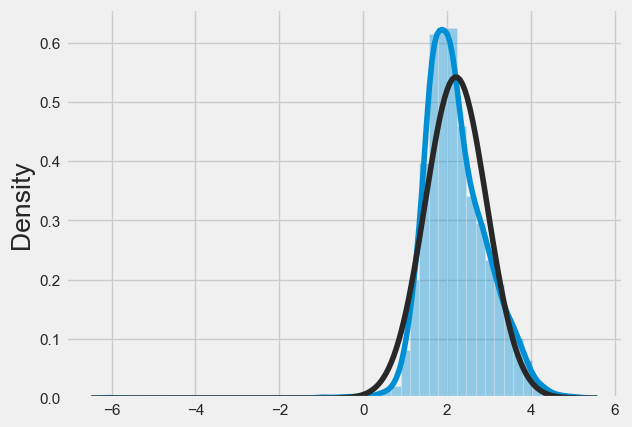

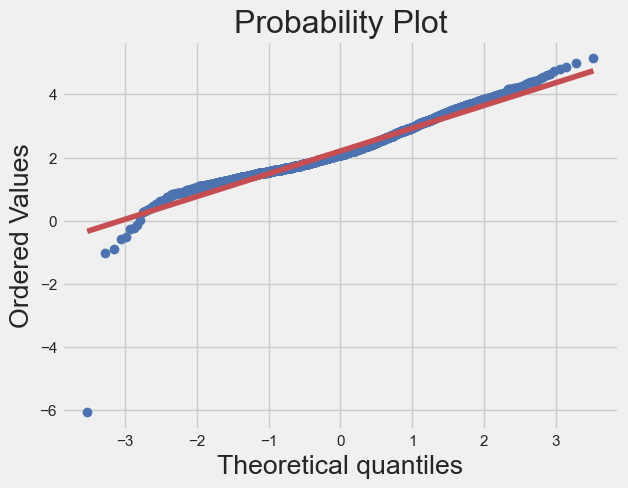

Distplot for log transformation of PM25


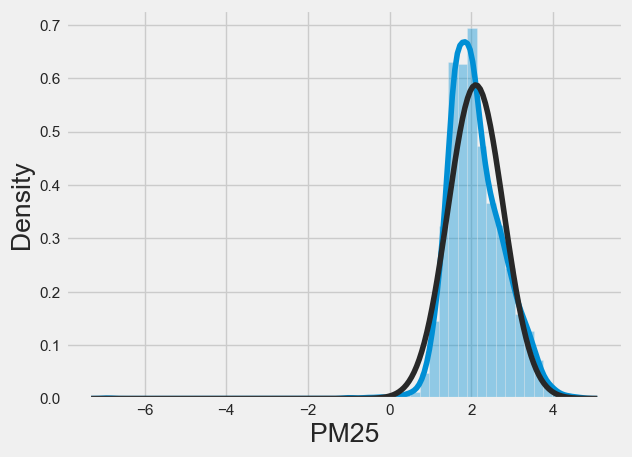

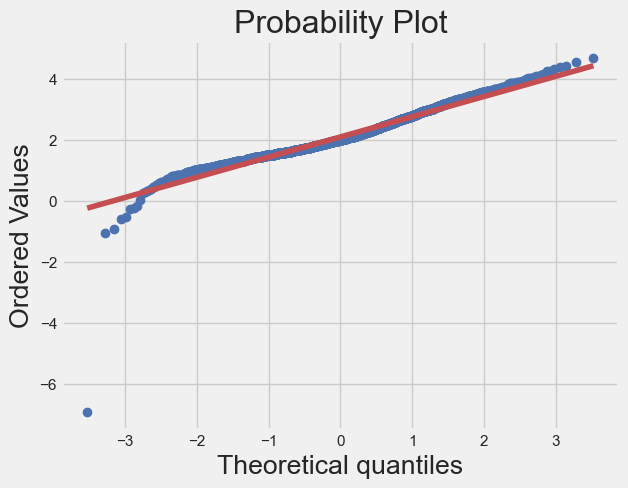

In [23]:
#manipulate data to allow for a log/boxcox transform
if train['PM25'].min() < 0:
    # If it contains negative values, shift all the values by the minimum value to make them positive
    train['PM25'] = train['PM25'] + abs(train['PM25'].min())

if train['PM25'].min() == 0:
    # If it contains zeroed values, shift all the values by one to make them positive
    train['PM25'] = train['PM25'] + .001

#See the updataed describtion of the data
print(train['PM25'].describe())

#First transform - boxcox, graph is shown and skewness is compared to untransformed data
check_box = pd.Series(train['PM25'])
try:
    check_box, _ = stats.boxcox(train['PM25'])
except ValueError as e:
    print(f"An error occurred: {e}")

print('Distplot for boxcox transformation of PM25')
sns.distplot(check_box, fit=norm);
fig = plt.figure()
res = stats.probplot(check_box, plot=plt)
plt.show()


#Second transform - log, graph is shown and skewness is compared to original and first transform
print('Distplot for log transformation of PM25')
sns.distplot(np.log(train['PM25']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(train['PM25']), plot=plt)



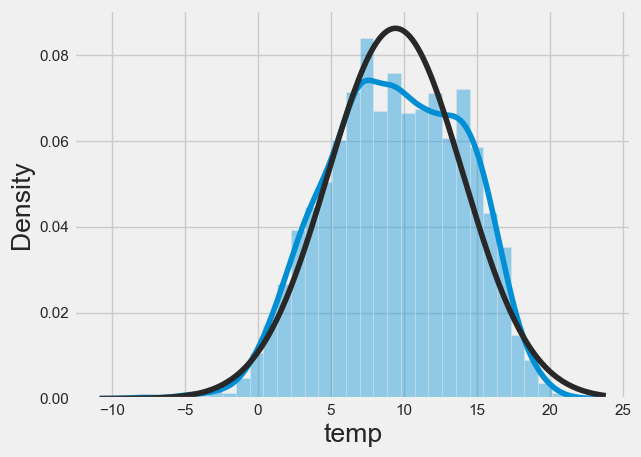

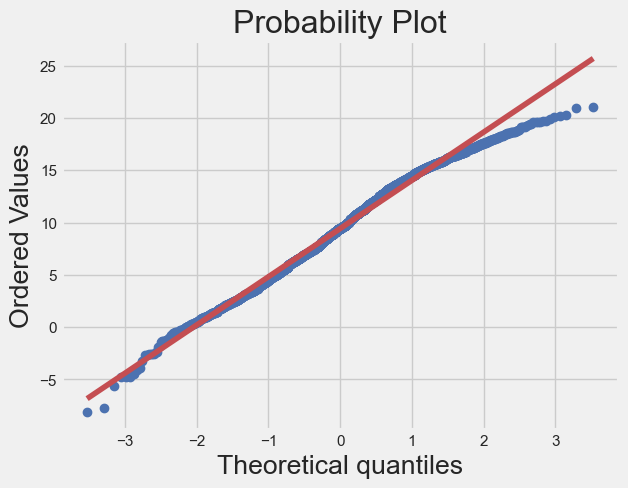

In [24]:
sns.distplot(train['temp'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['temp'], plot=plt)
plt.show()


count   3302.000
mean       9.433
std        4.629
min       -8.100
25%        6.100
50%        9.500
75%       13.200
max       21.100
Name: temp, dtype: float64
Distplot for scaled temp


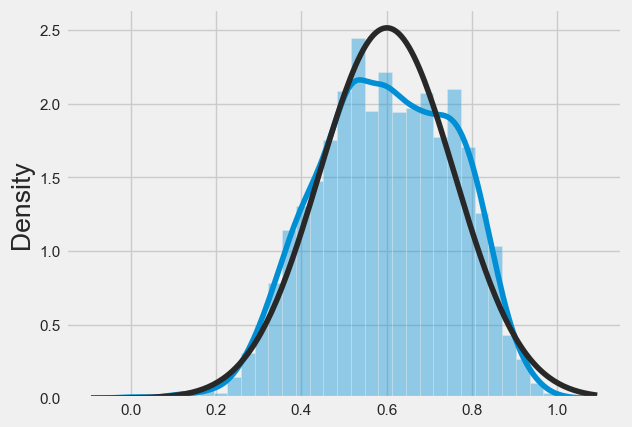

<Figure size 640x480 with 0 Axes>

In [25]:
print(train['temp'].describe())
temp_scaled_data = pd.DataFrame(train['temp'])
#scale the data
scaler = MinMaxScaler()
temp_scaled_data = scaler.fit_transform(temp_scaled_data)



print('Distplot for scaled temp')
sns.distplot(temp_scaled_data, fit=norm);
fig = plt.figure()

count   3302.000
mean      83.037
std        7.248
min       54.000
25%       78.100
50%       83.200
75%       88.300
max      100.000
Name: r_hum, dtype: float64
Distplot for relative humidity


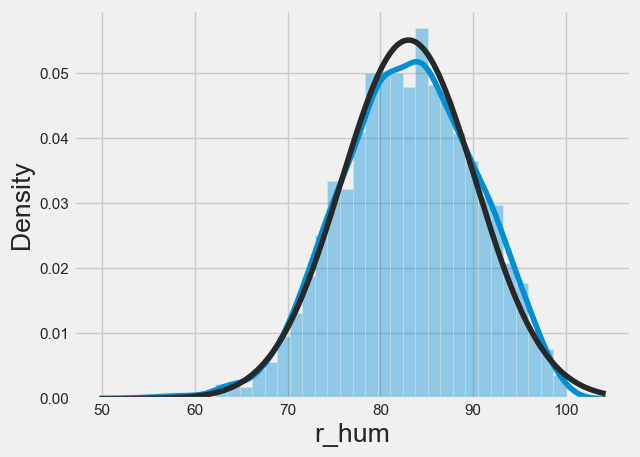

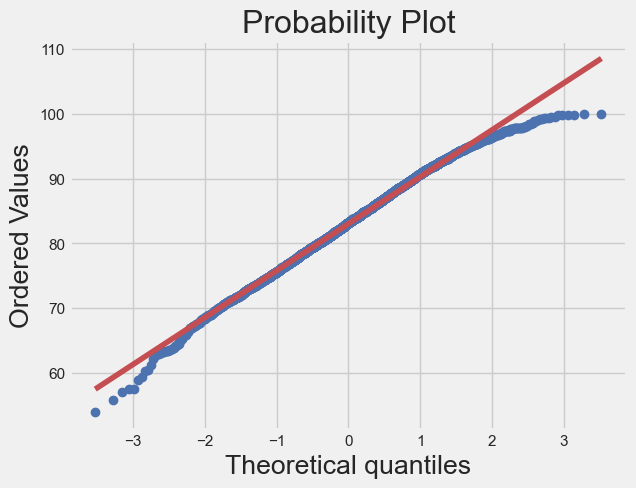


Distplot for boxcox transform of relative humidity


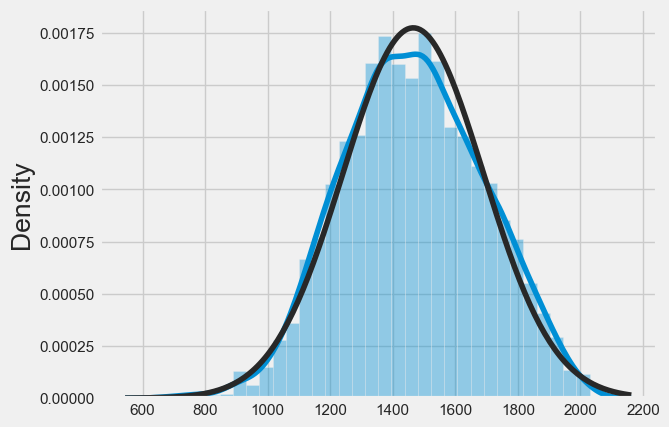

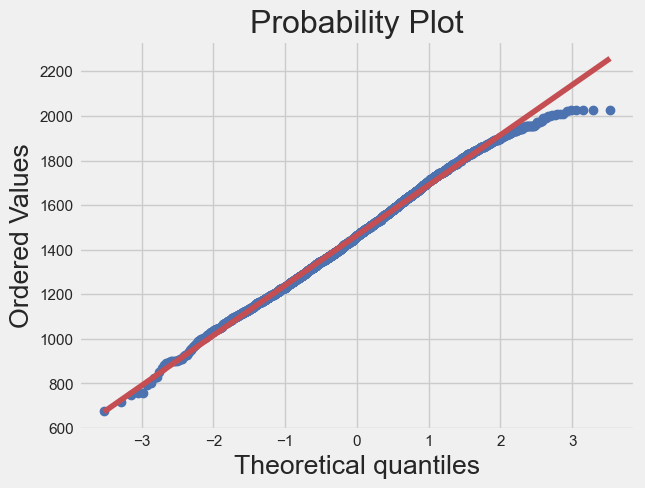


Distplot for log transform of relative humidity


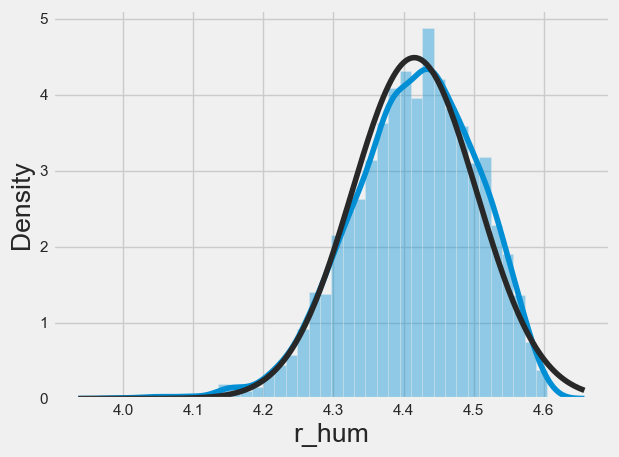

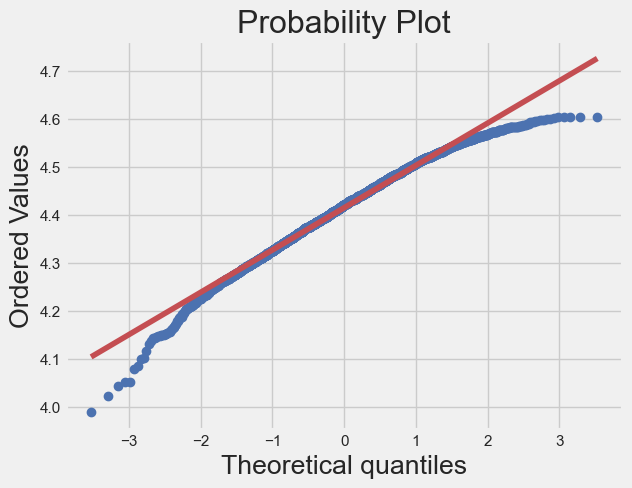

In [26]:
#Initial stats and graphs for relative humidity
print(train['r_hum'].describe())
print("Distplot for relative humidity")
sns.distplot(train['r_hum'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['r_hum'], plot=plt)
plt.show()

#BoxCox Transform
check_box = pd.Series(train['r_hum'])
try:
    check_box, _ = stats.boxcox(train['r_hum'])
except ValueError as e:
    print(f"An error occurred: {e}")

#Graphs and stats for BoxCox transform
print('\nDistplot for boxcox transform of relative humidity')
sns.distplot(check_box, fit=norm);
fig = plt.figure()
res = stats.probplot(check_box, plot=plt)
plt.show()

#Graphs and stats for log transform
print('\nDistplot for log transform of relative humidity')
train['r_hum'] = np.log(train['r_hum'])
sns.distplot(train['r_hum'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['r_hum'], plot=plt)
plt.show()



count   3302.000
mean       4.415
std        0.089
min        3.989
25%        4.358
50%        4.421
75%        4.481
max        4.605
Name: r_hum, dtype: float64
Distplot for boxcox transformation of PM25


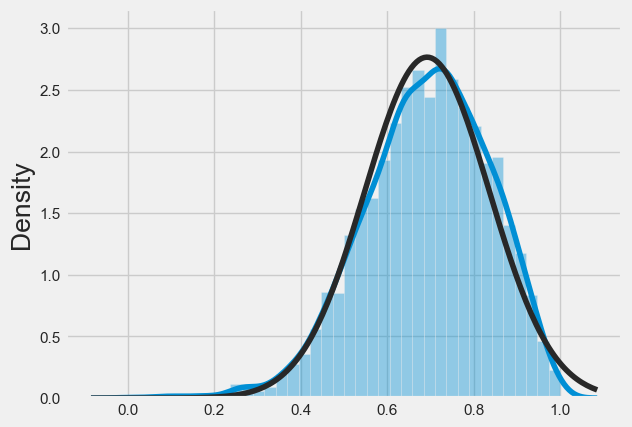

<Figure size 640x480 with 0 Axes>

In [27]:
print(train['r_hum'].describe())
rhum_scaled_data = pd.DataFrame(train['r_hum'])
#scale the data
scaler = MinMaxScaler()
rhum_scaled_data = scaler.fit_transform(rhum_scaled_data)



print('Distplot for boxcox transformation of PM25')
sns.distplot(rhum_scaled_data, fit=norm);
fig = plt.figure()

count   3302.000
mean      10.697
std        4.309
min        2.300
25%        7.500
50%        9.900
75%       13.300
max       28.800
Name: wdsp, dtype: float64

Initial Distplot for windspeed


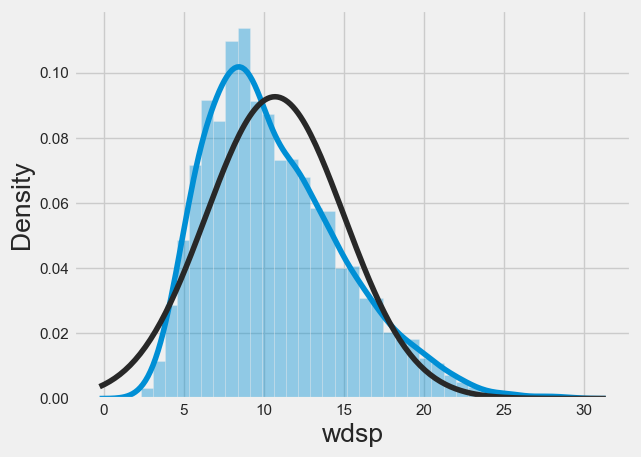

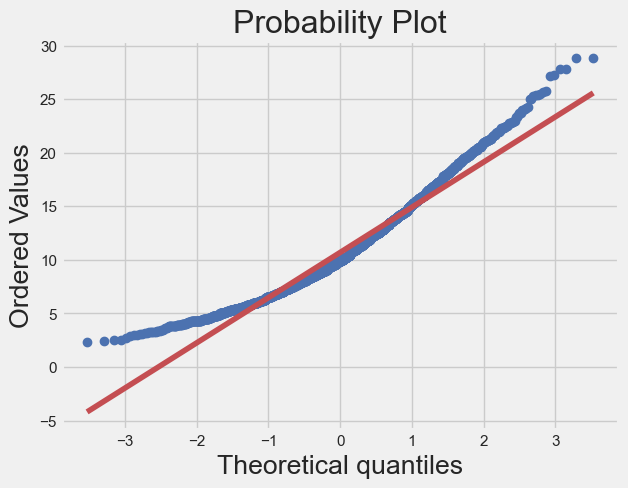


Distplot for boxcox transform of windspeed


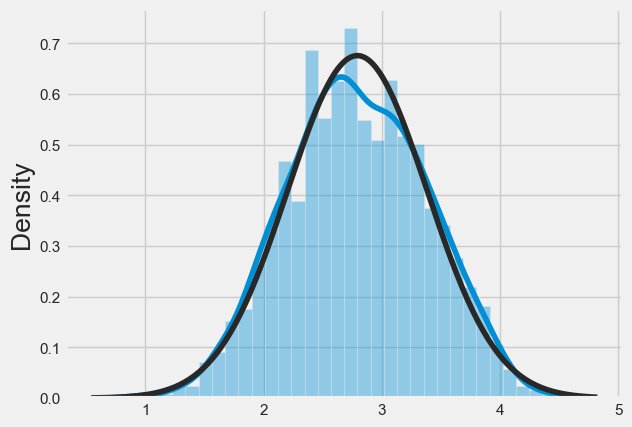

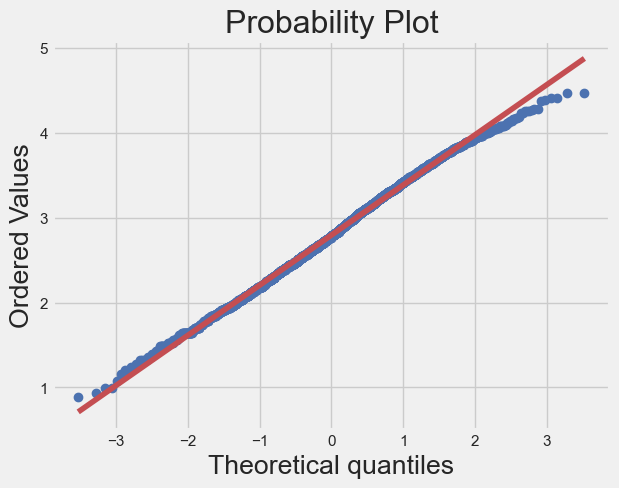


Distplot for log transform of windspeed


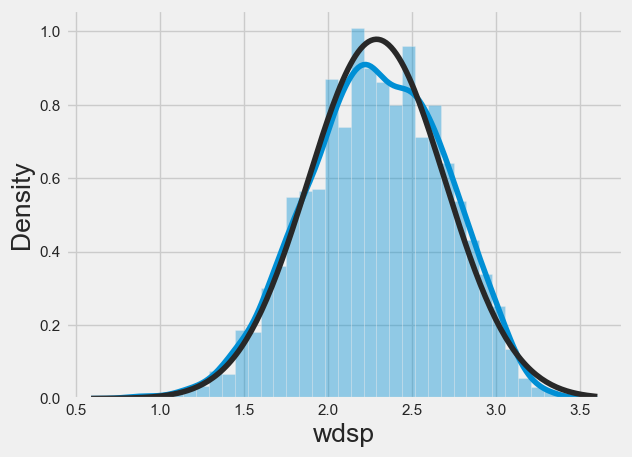

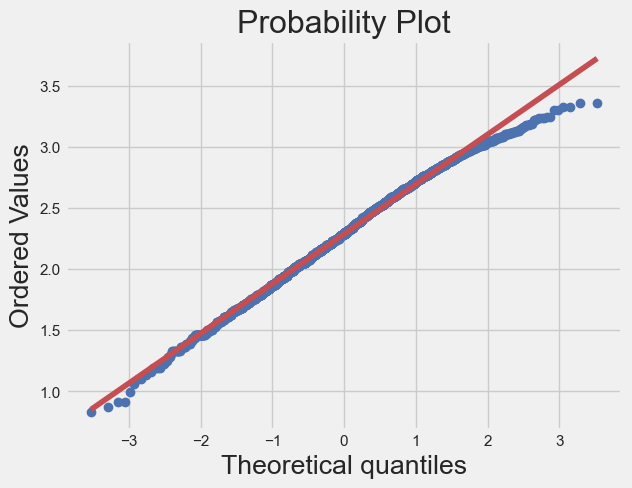

In [28]:
#Initial graphs and stats for boxcox
print(train['wdsp'].describe())
print('\nInitial Distplot for windspeed')
sns.distplot(train['wdsp'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['wdsp'],plot = plt)
plt.show()

#BoxCox Transform
check_box = pd.Series(train['wdsp'])
try:
    check_box, _ = stats.boxcox(train['wdsp'])
except ValueError as e:
    print(f"An error occurred: {e}")
    
#Graphs and stats for BoxCox transform
print('\nDistplot for boxcox transform of windspeed')
sns.distplot(check_box, fit=norm);
fig = plt.figure()
res = stats.probplot(check_box, plot=plt)
plt.show()

#Graphs and stats for log transform
print('\nDistplot for log transform of windspeed')
train['wdsp'] = np.log(train['wdsp'])
sns.distplot(train['wdsp'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['wdsp'],plot = plt)
plt.show()

count   3302.000
mean       2.289
std        0.408
min        0.833
25%        2.015
50%        2.293
75%        2.588
max        3.360
Name: wdsp, dtype: float64
Distplot for boxcox transformation of PM25


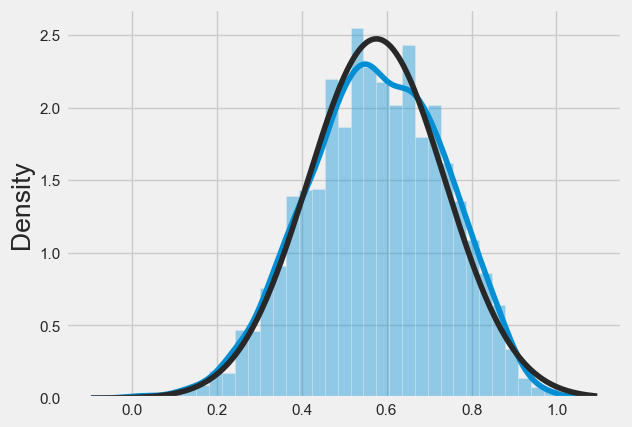

<Figure size 640x480 with 0 Axes>

In [29]:
print(train['wdsp'].describe())
wdsp_scaled_data = pd.DataFrame(train['wdsp'])
#scale the data
scaler = MinMaxScaler()
wdsp_scaled_data = scaler.fit_transform(wdsp_scaled_data)



print('Distplot for boxcox transformation of PM25')
sns.distplot(wdsp_scaled_data, fit=norm);
fig = plt.figure()

count   3302.000
mean    1013.277
std       12.032
min      960.000
25%     1006.000
50%     1014.000
75%     1021.000
max     1042.000
Name: msl, dtype: float64


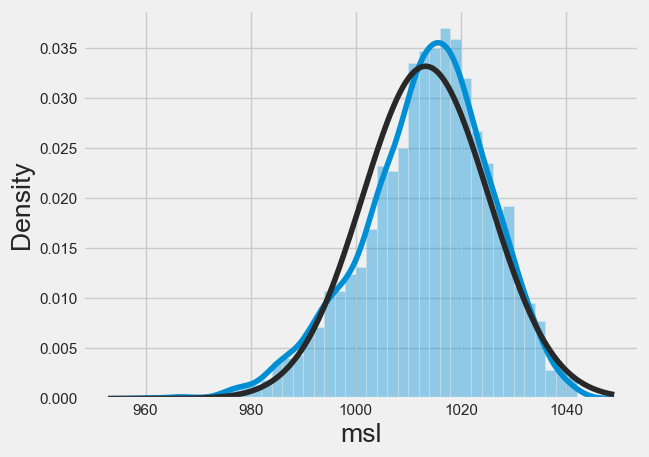

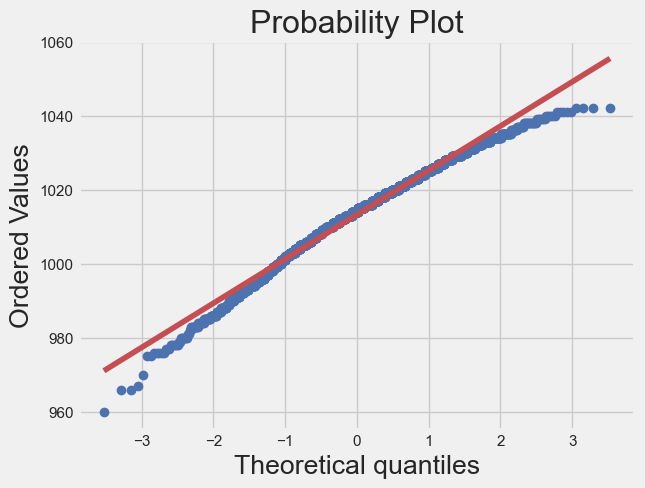

In [30]:
#Describe data to see basic descriptive stats
print(train['msl'].describe())
#Graph target variable - we see it does not follow the normal fit
sns.distplot(train['msl'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['msl'], plot=plt)
plt.show()



Distplot for scaled temp


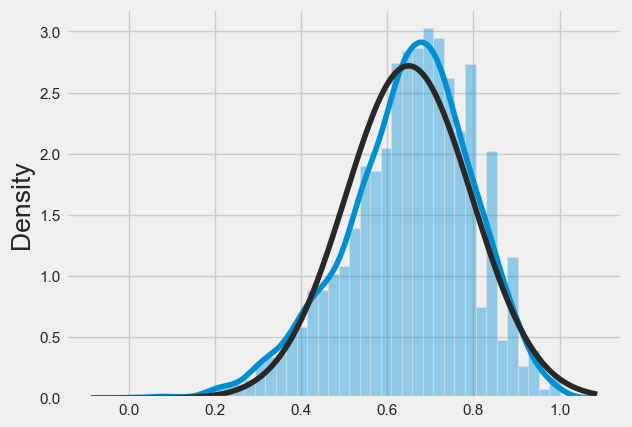

<Figure size 640x480 with 0 Axes>

In [31]:
msl_scaled_data = pd.DataFrame(train['msl'])
#scale the data
scaler = MinMaxScaler()
msl_scaled_data = scaler.fit_transform(msl_scaled_data)



print('Distplot for scaled temp')
sns.distplot(msl_scaled_data, fit=norm);
fig = plt.figure()